In [1]:
# packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import random
import pylab 
plt.rcParams['figure.figsize'] = [10, 5]
from lifelines.statistics import logrank_test

In [2]:
df = pd.read_csv("./classified.csv")
df["Age"]=2020-df["Earliest_Pub"]
df["citperyear"] = df["Citations"]/df["Age"]
df["citperyear13"] = df["Citations"]/df["Age"]**1.3

#to debug
df = df[df["Age"]>=0]
df.head()

,School,Role,Citations,Earliest_Pub,Field_1,Field_2,Major field,Age,citperyear,citperyear13
0,Arizona State University,Professor,223,1986,Systems theory; control,NaN,Applied Math,34,6.558824,2.277101
1,Arizona State University,Professor,148,1985,Statistics,NaN,Statistics,35,4.228571,1.455369
2,Arizona State University,Professor,172,1983,"Statistical mechanics, structure of matter",NaN,Mathematical Physics,37,4.648649,1.573498
3,Arizona State University,Professor,703,1982,Special functions,NaN,Analysis,38,18.500000,6.212074
4,Arizona State University,Professor,346,1979,Several complex variables and analytic spaces,NaN,Complex Analysis,41,8.439024,2.769855


## Distribution of Citations and Citations/Year1.3

Text(0, 0.5, 'Count')

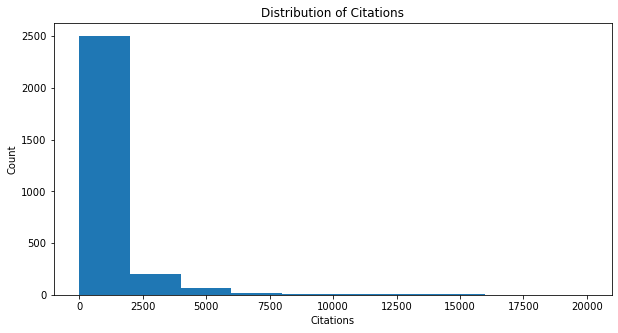

In [3]:
plt.hist(df.Citations)
plt.title("Distribution of Citations")
plt.xlabel("Citations")
plt.ylabel("Count")

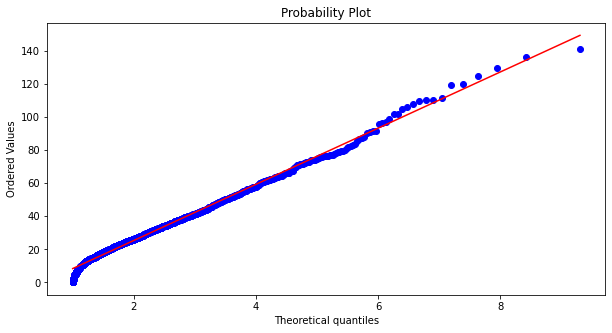

In [4]:
fig = plt.figure()
ax = plt.subplot(111)
stats.probplot(df.Citations**0.5, dist=stats.expon, sparams=1.0, plot=ax)
plt.show()

Text(0, 0.5, 'Count')

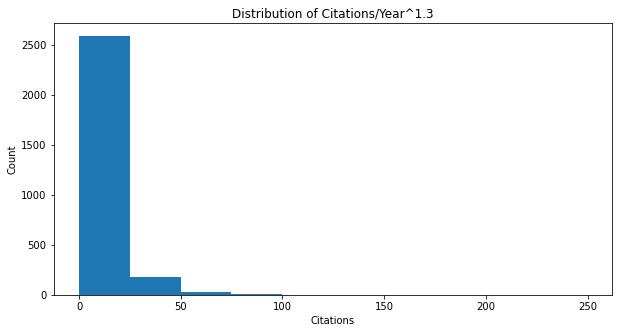

In [5]:
plt.hist(df.citperyear13)
plt.title("Distribution of Citations/Year^1.3")
plt.xlabel("Citations")
plt.ylabel("Count")

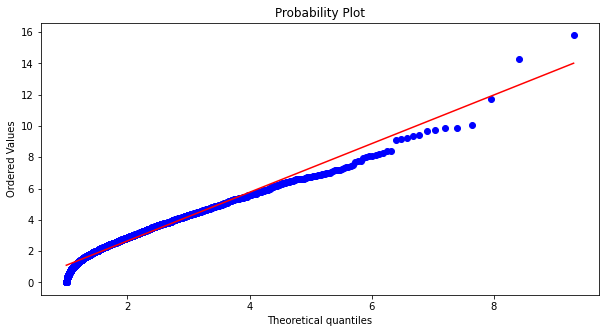

In [6]:
fig = plt.figure()
ax = plt.subplot(111)
stats.probplot(df.citperyear13**0.5, dist=stats.expon, sparams=1.0, plot=ax)
plt.show()

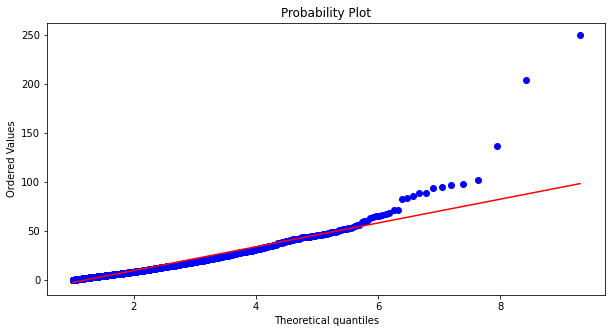

In [7]:
fig = plt.figure()
ax = plt.subplot(111)
stats.probplot(df.citperyear13, dist=stats.expon, sparams=1.0, plot=ax)
plt.show()

**NOTE** the above is a *better* fit at the low range, and obviously has too fat a tail. So unclear if the 0.5 is needed.

## Citations and Age

In [8]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df["Age"],df["citperyear13"])

confidence_interval = 1.96*std_err
print("slope:", slope)
print("intercept:", intercept)
print("r", r_value)
print("pvalue", p_value)
print([slope-confidence_interval, slope+confidence_interval])

slope: 0.03383062665247128
intercept: 8.396234644794568
r 0.029228386522290237
pvalue 0.12157561478012142
[-0.008985684829031844, 0.07664693813397441]


In [9]:
x = np.linspace(0,70,1000)
y = slope*x + intercept

Text(0, 0.5, 'Citations/Year^1.3')

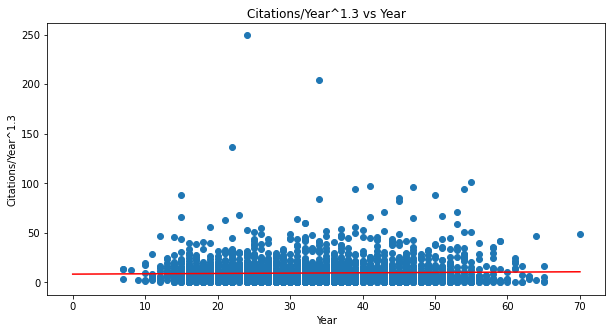

In [10]:
plt.scatter(df["Age"],df["citperyear13"])
plt.plot(x,y,color='red')
plt.title("Citations/Year^1.3 vs Year")
plt.xlabel("Year")
plt.ylabel("Citations/Year^1.3")

## Hasse Linear Models is in RMarkdown

## Field Means and Medians

In [11]:
field = pd.pivot_table(df,index=["Major field"],values=["Citations"],aggfunc=[np.mean])
# change to median
field.unstack().sort_values(ascending=False)

                 Major field         
mean  Citations  PDE                     1472.069892
                 Computer Science        1260.444444
                 Probability             1165.919708
                 Harmonic analysis       1120.015000
                 Combinatorics           1023.241379
                 Analysis                 977.177778
                 Algebra                  934.422727
                 Geometry                 890.684887
                 Algebraic Geometry       846.621302
                 Number theory            742.660377
                 Group theory             686.382716
                 Applied Math             646.602007
                 Mathematical Physics     643.010417
                 Logic                    634.000000
                 Complex Analysis         612.860870
                 Dynamics                 560.441176
                 Lie Groups               512.023256
                 Statistics               220.734940
        

In [12]:
field = pd.pivot_table(df,index=["Major field"],values=["Citations"],aggfunc=[np.std])
# change to median
field.unstack().sort_values(ascending=False)

                Major field         
std  Citations  Computer Science        2223.058982
                PDE                     2182.451039
                Analysis                1951.947306
                Combinatorics           1673.528793
                Geometry                1486.717175
                Probability             1401.065551
                Harmonic analysis       1336.622119
                Algebra                 1310.588372
                Algebraic Geometry      1308.796179
                Group theory            1151.643962
                Applied Math             976.984347
                Number theory            920.306566
                Complex Analysis         725.153328
                Mathematical Physics     716.407169
                Logic                    690.139787
                Lie Groups               590.594877
                Dynamics                 555.169287
                Statistics               331.145465
                History    

In [13]:
field = pd.pivot_table(df,index=["Major field"],values=["citperyear13"],aggfunc=[np.mean])

field.unstack().sort_values(ascending=False)

                    Major field         
mean  citperyear13  PDE                     14.576598
                    Computer Science        14.080446
                    Probability             12.062677
                    Harmonic analysis       10.514860
                    Combinatorics           10.084229
                    Algebraic Geometry       9.509696
                    Algebra                  9.116993
                    Geometry                 8.868060
                    Number theory            7.382772
                    Dynamics                 7.326294
                    Mathematical Physics     7.248634
                    Analysis                 7.148419
                    Applied Math             6.870968
                    Group theory             6.737234
                    Logic                    6.317548
                    Complex Analysis         6.170996
                    Lie Groups               4.780825
                    Statistics           

In [14]:
field = pd.pivot_table(df,index=["Major field"],values=["citperyear13"],aggfunc=[np.std])

field.unstack().sort_values(ascending=False)

                   Major field         
std  citperyear13  Computer Science        20.857520
                   PDE                     19.785503
                   Probability             12.333283
                   Combinatorics           12.215903
                   Analysis                11.391800
                   Harmonic analysis       10.596417
                   Algebra                 10.345516
                   Geometry                10.281738
                   Algebraic Geometry       9.874176
                   Applied Math             9.415263
                   Mathematical Physics     8.159933
                   Group theory             7.618429
                   Number theory            7.229791
                   Complex Analysis         6.343993
                   Dynamics                 6.200505
                   Logic                    5.485170
                   Statistics               4.593226
                   Lie Groups               4.358559
      

In [15]:
count = pd.pivot_table(df,index=["Major field"],values=["citperyear13"],aggfunc=[len])
count.unstack().sort_values(ascending=False)[:30]

                   Major field         
len  citperyear13  PDE                     372.0
                   Geometry                311.0
                   Applied Math            299.0
                   Computer Science        225.0
                   Algebra                 220.0
                   Harmonic analysis       200.0
                   Algebraic Geometry      169.0
                   Number theory           159.0
                   Probability             137.0
                   Combinatorics           116.0
                   Complex Analysis        115.0
                   Mathematical Physics     96.0
                   Statistics               83.0
                   Group theory             81.0
                   Dynamics                 68.0
                   Logic                    55.0
                   Analysis                 45.0
                   Lie Groups               43.0
                   Other                    11.0
                   History   

In [16]:
PDE = df[df["Major field"]=="PDE"]["citperyear13"].values
CS = df[df["Major field"]=="Computer Science"]["citperyear13"].values
Probability = df[df["Major field"]=="Probability"]["citperyear13"].values
Harmonic_Analysis = df[df["Major field"]=="Harmonic analysis"]["citperyear13"].values
Comb = df[df["Major field"]=="Combinatorics"]["citperyear13"].values
Algebra = df[df["Major field"]=="Algebra"]["citperyear13"].values
Alg_Geometry = df[df["Major field"]=="Algebraic Geometry"]["citperyear13"].values
Geometry = df[df["Major field"]=="Geometry"]["citperyear13"].values
Number_Theory = df[df["Major field"]=="Number theory"]["citperyear13"].values
Dynamics = df[df["Major field"]=="Dynamics"]["citperyear13"].values
M_Physics = df[df["Major field"]=="Mathematical Physics"]["citperyear13"].values
Analysis = df[df["Major field"]=="Analysis"]["citperyear13"].values
Applied_Math = df[df["Major field"]=="Applied Math"]["citperyear13"].values
Groups = df[df["Major field"]=="Group theory"]["citperyear13"].values
Logic = df[df["Major field"]=="Logic"]["citperyear13"].values
Complex_Analysis = df[df["Major field"]=="Complex Analysis"]["citperyear13"].values
Lie_Groups = df[df["Major field"]=="Lie Groups"]["citperyear13"].values
Statistics = df[df["Major field"]=="Statistics"]["citperyear13"].values
History = df[df["Major field"]=="History"]["citperyear13"].values
Other = df[df["Major field"]=="Other"]["citperyear13"].values

L = [("PDE",PDE),("Computer Science",CS),("Probability",Probability), ("Harmonic Analysis",Harmonic_Analysis), 
     ("Combinatorics",Comb), ("Algebra",Algebra)
     ,("Algebraic Geometry",Alg_Geometry), ("Geometry",Geometry), ("Number Theory",Number_Theory),
    ("Dynamics",Dynamics), ("Mathematical Physics",M_Physics), ("Analysis",Analysis), ("Applied Mathematics",Applied_Math), 
     ("Group Theory",Groups)
     , ("Logic",Logic), ("Complex Analysis",Complex_Analysis), ("Lie Groups",Lie_Groups), ("Statistics",Statistics),
    ("History",History), ("Other",Other)]

In [28]:
def run_permutation_test(pooled,sizeZ,sizeY):
    np.random.shuffle(pooled)
    starZ = pooled[:sizeZ]
    starY = pooled[-sizeY:]
    return starY.mean() - starZ.mean()
def check(list1): 
    count = 0
    for x in list1: 
        if x<= delta: 
            count +=1
    return count/len(list1)

In [29]:
#H0 Z = Y
#H1 Z > Y
done = []
for z in L:
    done.append(z)
    for y in L:
        if y not in done:
            np.random.seed(0)
            pooled = np.hstack([z[1],y[1]])
            delta = y[1].mean() - z[1].mean()
            numSamples = 10000
            l=[]
            for i in range(numSamples):
                x = run_permutation_test(pooled,z[1].size,y[1].size)
                l.append(x)
            if check(l) > 0.05:
                print(z[0], ">=", y[0], "--- p-value:", check(l))

PDE >= Computer Science --- p-value: 0.397
PDE >= Probability --- p-value: 0.0768
Computer Science >= Probability --- p-value: 0.156
Probability >= Harmonic Analysis --- p-value: 0.113
Probability >= Combinatorics --- p-value: 0.1049
Harmonic Analysis >= Combinatorics --- p-value: 0.3824
Harmonic Analysis >= Algebra --- p-value: 0.0961
Harmonic Analysis >= Algebraic Geometry --- p-value: 0.1807
Combinatorics >= Algebra --- p-value: 0.2181
Combinatorics >= Algebraic Geometry --- p-value: 0.3265
Combinatorics >= Geometry --- p-value: 0.1544
Combinatorics >= Analysis --- p-value: 0.0719
Algebra >= Algebraic Geometry --- p-value: 0.6461
Algebra >= Geometry --- p-value: 0.3989
Algebra >= Dynamics --- p-value: 0.0813
Algebra >= Mathematical Physics --- p-value: 0.0546
Algebra >= Analysis --- p-value: 0.1232
Algebraic Geometry >= Geometry --- p-value: 0.2533
Algebraic Geometry >= Analysis --- p-value: 0.0782
Geometry >= Number Theory --- p-value: 0.0534
Geometry >= Dynamics --- p-value: 0.107

# Interfield Z-scores

In [30]:
dflist = []
for i, j in df.groupby('Major field'):
    #display(j)
    ss = StandardScaler()
    newcol = ss.fit_transform(j[['citperyear13']])
    newercol = pd.DataFrame(newcol, columns = ['zscore'], index=j.index)
    #display(newercol)
    #display(newercol.info())
    newdf = pd.concat([j, newercol], axis=1)
    dflist.append(newdf)
standardized = pd.concat(dflist)
standardized.head()

,School,Role,Citations,Earliest_Pub,Field_1,Field_2,Major field,Age,citperyear,citperyear13,zscore
33,Auburn University,Professor,105,1976,Linear and multilinear algebra; matrix theory,NaN,Algebra,44,2.386364,0.766833,-0.808969
49,Auburn University,Professor,1734,1981,Associative rings and algebras,NaN,Algebra,39,44.461538,14.813753,0.551906
54,Binghamton University,Professor,280,1977,Nonassociative rings and algebras,NaN,Algebra,43,6.511628,2.106925,-0.679140
100,Brandeis University,Professor,629,1979,Associative rings and algebras,NaN,Algebra,41,15.341463,5.035373,-0.395430
112,Brown University,Professor,190,1991,Algebraic topology,NaN,Algebra,29,6.551724,2.385812,-0.652121


In [31]:
# sanity check. All sd are same
for x in standardized["Major field"].unique():
    fjj = standardized[standardized["Major field"] == x]["zscore"]
    print(x, np.std(fjj))

Algebra 1.0000000000000002
Algebraic Geometry 0.9999999999999999
Analysis 1.0
Applied Math 0.9999999999999996
Combinatorics 0.9999999999999998
Complex Analysis 1.0000000000000002
Computer Science 0.9999999999999996
Dynamics 1.0
Geometry 1.0
Group theory 0.9999999999999998
Harmonic analysis 0.9999999999999998
History 1.0
Lie Groups 0.9999999999999998
Logic 1.0
Mathematical Physics 1.0000000000000004
Number theory 0.9999999999999997
Other 0.9999999999999999
PDE 0.9999999999999997
Probability 1.0
Statistics 1.0


In [50]:
standardized["zscore2"] = standardized.zscore**2
standardized.zscore2

33      0.654431
49      0.304600
54      0.461231
100     0.156365
112     0.425262
          ...   
2721    0.255475
2731    1.523453
2732    0.135280
2733    0.206222
2761    0.271291
Name: zscore, Length: 2807, dtype: float64

# Rankings of universities top 38

In [56]:
byschool = standardized.groupby('School').zscore.mean().sort_values( ascending=False)


In [57]:
byschool[:50]


School
Princeton University                           1.772333
Harvard University                             1.465666
Stanford University                            1.019265
University of Chicago                          0.955099
Columbia University in the City of New York    0.902455
Massachusetts Institute of Technology          0.864781
University of California, Los Angeles          0.835296
University of Miami                            0.782862
Yale University                                0.759163
Brown University                               0.617112
University of California, Berkeley             0.592989
New York University                            0.591825
University of Oregon                           0.535733
California Institute of Technology             0.425761
Duke University                                0.399966
Stony Brook University                         0.385291
Rutgers University-New Brunswick               0.323667
University of Virginia                   

It is interesting that so few places are above average...

In [58]:
byschool[50:100]

School
University of Pennsylvania                                       -0.090948
Brandeis University                                              -0.103217
Colorado State University                                        -0.107424
University of Notre Dame                                         -0.112700
University of California, Santa Barbara                          -0.124383
University of North Carolina at Chapel Hill                      -0.126511
University of Houston                                            -0.129775
University of Iowa                                               -0.142739
The Ohio State University                                        -0.158593
University of South Florida                                      -0.162873
Michigan State University                                        -0.176252
University of California, Davis                                  -0.179939
Virginia Polytechnic Institute and State University              -0.182176
University of Miss

In [59]:
byschool[100:]

School
University of Nevada, Reno             -0.449023
West Virginia University               -0.449922
Auburn University                      -0.455573
The University of Texas at Arlington   -0.457660
Texas Tech University                  -0.461208
University of Arizona                  -0.469724
Binghamton University                  -0.473284
University of New Mexico               -0.489398
The University of Alabama              -0.489536
The University of Texas at Dallas      -0.501795
George Mason University                -0.503771
Florida Institute University           -0.505568
University of Oklahoma                 -0.509256
University of Colorado Boulder         -0.511068
University of Hawaii at Manoa          -0.513600
Case Western Reserve University        -0.514692
University of Alabama at Birmingham    -0.515641
Oklahoma State University              -0.519153
Kansas State University                -0.522584
Temple University                      -0.523601
Oregon State 